# Laboratorio 2

En este trabajo se pretende analizar los diferentes tipos de incendios forestales y distintos tipos de superficies incendiadas en Argentina, y cómo es su distribución en las distintas provincias en los últimos años. 



## Descripción de los dataset

Los sets de datos utilizados fueron elaborados por el Ministerio de Ambiente y Desarrollo Sustentable (se puede encontrar en este [link](http://datos.ambiente.gob.ar/dataset/12f60bea-3225-4375-935c-1fb9ebe3ef57), en el portal de datos abiertos del Ministerio de Modernización). En primera instancia, para poder entender los datos e interpretarlos hay que tener en cuenta lo que se entiende por incendio forestal y los diferentes tipos de incendios. Como podemos ver [aquí](http://ambiente.gob.ar/wp-content/uploads/estad%C3%ADstica_incendios_forestales_2016.pdf#page=8), se entiende por *incendio forestal* a cualquier fuego que se extiende sin control en terreno forestal afectando vegetación que no estaba destinada a arder.

Los diferentes tipos de incendio que se van a considerar en uno de los dataset se caracterizan de la siguiente manera:
   
- **Intencional:** fuego provocado para obtener un beneficio. Ejemplo: quema de bosques para favorecer el desarrollo de pasturas.
- **Negligencia:** fuego provocado por descuido. Ejemplo: fogón mal apagado.
- **Natural:** fuego provocado por las sequías, altas temperaturas, tormentas eléctricas.

En el caso de no conocer la causa se lo considera como de tipo **desconocido**

En este *dataset* se encuentra la información indexada por año (desde 1993 hasta el 2016) y por provincia, y para cada año y provincia podemos encontrar la cantidad total de incendios y la cantidad de incendios por tipo.  


En cuanto al segundo dataset encontramos información de las hectareas afectadas segun el tipo de vegetación, entre ellos encontramos:

- **Bosque:** es una agrupación de plantas en la que predominan los árboles u otra vegetación leñosa y cuya cobertura es de al
  menos el 20% de la superficie.
- **Bosque nativo:** es un bosque que ha evolucionado a partir de organismos que ya estaban en el lugar (predominio de especies autóctonas) y cuya cobertura es de al menos el 20% de la superficie y la altura de los árboles a la madurez es > o = a 4 metros.
- **Bosque cultivado:** es una plantación forestal obtenida mediante la implantación de árboles o estacas.
- **Pastizal:** terreno de pastos, en el que el combustible principal es hierba, sin importar altura.
- **Arbustal o matorral:** terreno con plantas que se diferencian de las hierbas por sus tallos persistentes y leñosos, y de los bosques por su
  poca altura (hasta 4 metros) y su tendencia a ramificarse desde la base.
 
En el caso de no conocer el tipo de vegetación afectada por el incendio se lo considera como **sin_determinar**

In [0]:
%matplotlib inline
import sys
import importlib
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
import scipy as sp

matplotlib.rcParams['figure.figsize'] = 10, 8
#stylingm 
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

data_cant = pd.read_csv('http://datos.ambiente.gob.ar/dataset/12f60bea-3225-4375-935c-1fb9ebe3ef57/resource/93c2f293-9698-4457-92cf-e07856d8edb2/download/incendios-cantidad-causas-provincia.csv', 
                   sep=';',encoding = 'latin-1')

data_sup = pd.read_csv('http://datos.ambiente.gob.ar/dataset/12f60bea-3225-4375-935c-1fb9ebe3ef57/resource/c7b70f96-5562-4673-9b61-6ead123a99f7/download/superficie-incendiada-provincias-tipo-de-vegetacion.csv',                    
                  sep=';',encoding = 'latin-1')

data_cant = data_cant.rename(columns={'incendio_anio': 'anio', 
                     'incendio_provincia': 'provincia', 
                     'incendio_total_numero': 'total', 
                     'incendio_negligencia_numero': 'negligencia', 
                     'incendio_intencional_numero': 'intencional', 
                     'incendio_natural_numero': 'natural', 
                     'incendio_desconocida_numero': 'desconocida'})


data_sup = data_sup.rename(columns={'superficie_afectada_por_incendios_anio':'anio', 
                     'superficie_afectada_por_incendios_provincia': 'provincia', 
                     'superficie_afectada_por_incendios_total_hectareas': 'sup_total', 
                     'superficie_afectada_por_incendios_bosque_nativo_hectareas': 'sup_bosque_nativo', 
                     'superficie_afectada_por_incendios_bosque_cultivado_hectareas': 'sup_bosque_cultivado', 
                     'superficie_afectada_por_incendios_arbustal_hectareas': 'sup_arbustal', 
                     'superficie_afectada_por_incendios_pastizal_hectareas': 'sup_pastizal',
                             'superficie_afectada_por_incendios_sin_determinar_hectareas':'sup_sin_determinar'})

data = pd.concat([data_cant.set_index(['anio', 'provincia']), data_sup.set_index(['anio', 'provincia'])], axis=1)

## Objetivo

En el presente informe se pretende analizar por un lado las causas de los incendios, ver que relación se encuentra en cada provincia y cómo fue su evolución en el tiempo.

Luego de este análisis se busca relacionar los resultados con el tipo de vegetación y superficie afectada en cada provincia. 

### Cantidad de incendios del 1993 al 2016


,total
count,24.000000
mean,8407.041667
std,4286.004276
min,538.000000
25%,5933.500000
50%,7671.500000
75%,10673.000000
max,17682.000000


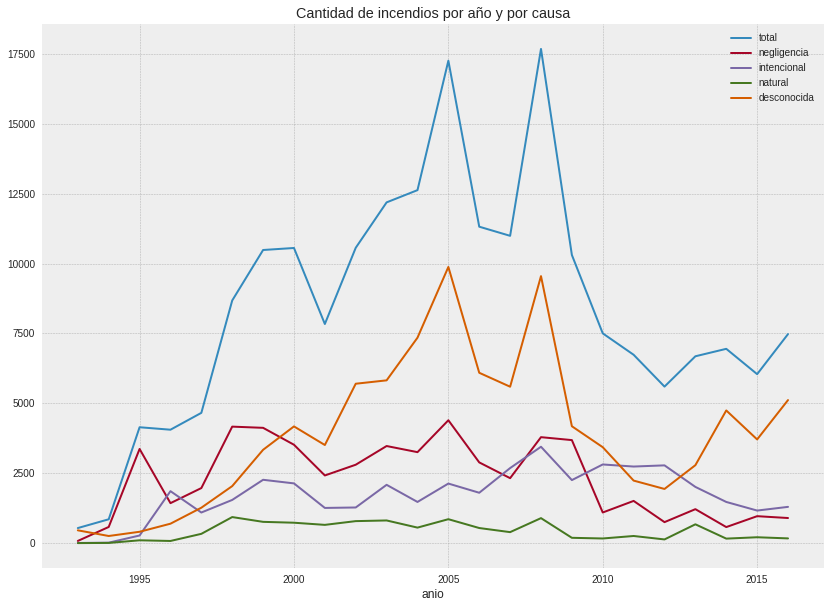

In [41]:
df_anio = data.groupby('anio', as_index = True).sum()
display(df_anio['total'].describe().to_frame())
df_anio.plot(y=['total', 'negligencia', 'intencional', 'natural', 'desconocida'],
        kind='line', 
        title=u'Cantidad de incendios por año y por causa', 
        figsize=(14,10))
plt.show()

En los 24 años de registros de incendios se puede remarcar una media de al rededor de 8400 incendios forestales en todo el pais, con un desvío de aproximadamente el 50% de la media, lo que indica mucha variación año a año (aunque hay que remarcar que esto pueda deberse a la falta de registros en algunos años y no al fenómeno en sí). Se puede notar que la causa de incendio que más aportó en las 24 provincias es de origen desconocido,  lo que imposibilita sacar conclusiones importantes.


Sin embargo este resultado puede estar viciado puesto que se está ponderando a todas las provincias por igual. Al realizar esto, puede suceder que  la provincia con mayor registro de datos se caracterice por tener registros de incendios desconocidos, y que tenga significativamente más registros que el resto (hecho que efectivamente sucede con la provincia de Buenos Aires).

### Análisis por region

Para analizar la problemática espacialmente, se pretende ahora ver la cantidad de incendios por provincias. Pero para tener una referencia rápida vamos a agrupar las provincias por regiones, considerando que provincias en una misma región tienen condiciones naturales similares. La división en regiones se va a hacer de la siguiente manera:

- Noroeste:
  - Jujuy
  - Salta
  - Catamarca
  - Tucumán
  - Santiago del Estero
- Noreste:
  - Misiones
  - Corrientes
  - Formosa
  - Chaco
- Cuyo:
  - La Rioja
  - San Juan
  - Mendoza
  - San Luis
- Centro:
  - Córdoba
  - Santa Fe
  - Entre Ríos
- Buenos Aires:
  - Buenos Aires
  - Ciudad Autónoma de Buenos Aires
- Patagonia:
  - La Pampa
  - Neuquén
  - Río Negro
  - Chubut
  - Santa Cruz
  - Tierra del Fuego

In [0]:
regiones = {}
regiones['Noroeste'] = ['Tucumán', 'Salta', 'Santiago del Estero', 'Jujuy', 'Catamarca']
regiones['Noreste'] = ['Misiones', 'Chaco', 'Corrientes', 'Formosa']
regiones['Cuyo'] = ['La Rioja', 'Mendoza', 'San Juan', 'San Luis']
regiones['Centro'] = ['Córdoba', 'Santa Fe', 'Entre Ríos']
regiones['Buenos Aires'] = ['Buenos Aires', 'Ciudad Autónoma de Buenos Aires']
regiones['Patagonia'] = ['Río Negro', 'La Pampa', 'Chubut', 'Neuquén', 'Santa Cruz', 'Tierra del Fuego']

data_regiones = pd.DataFrame(columns=['anio', 'region'] + list(data.columns)).set_index(['anio', 'region'])
for anio in data.index.get_level_values('anio'):
  for region in regiones.keys():
    data_regiones.loc[(anio, region), :] = data.select(lambda x: x[1] in regiones[region]).loc[anio].sum()

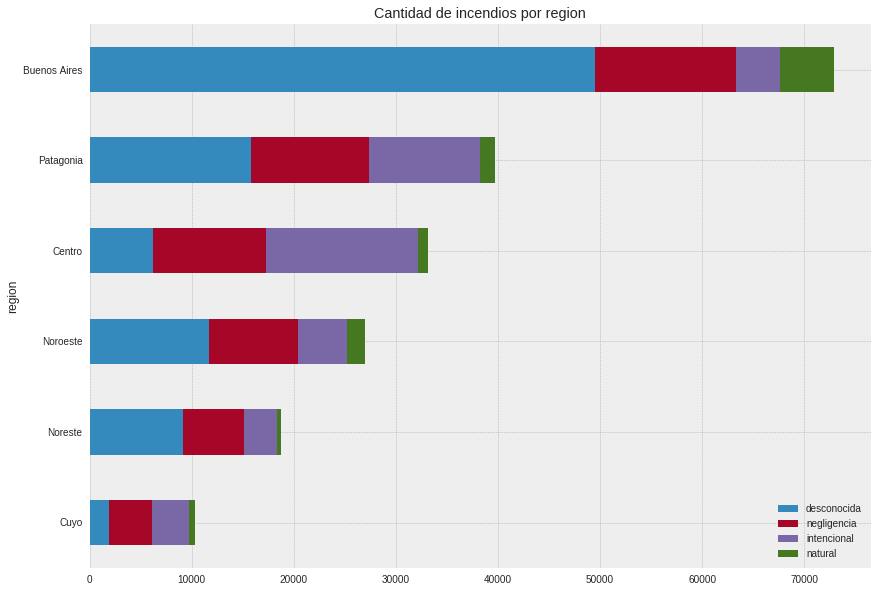

In [43]:
data_regiones.groupby('region', as_index = True).sum().sort_values('total').plot(
    y=['desconocida', 'negligencia', 'intencional', 'natural'],
    kind='barh', 
    stacked=True, 
    title="Cantidad de incendios por region", 
    figsize=(14,10))

plt.show()

Se puede ver como en las regiones de Buenos Aires, Noreste y Noroeste, la mayor cantidad de incendios tienen causa desconocida, lo que hace muy complicado sacar conclusiones. En la región centro podemos ver gran cantidad de incendios intencionales o por negligencia. En todas las regiones se puede ver un porcentaje muy pequeño de incendios provocado por causas naturales, afirmando que la mayoría de los incendios son provocados por los seres humanos. 

Otro dato a tener en cuenta es que en Cuyo, unas de las regiones más secas, es la que menos cantidad de incendios tuvo.

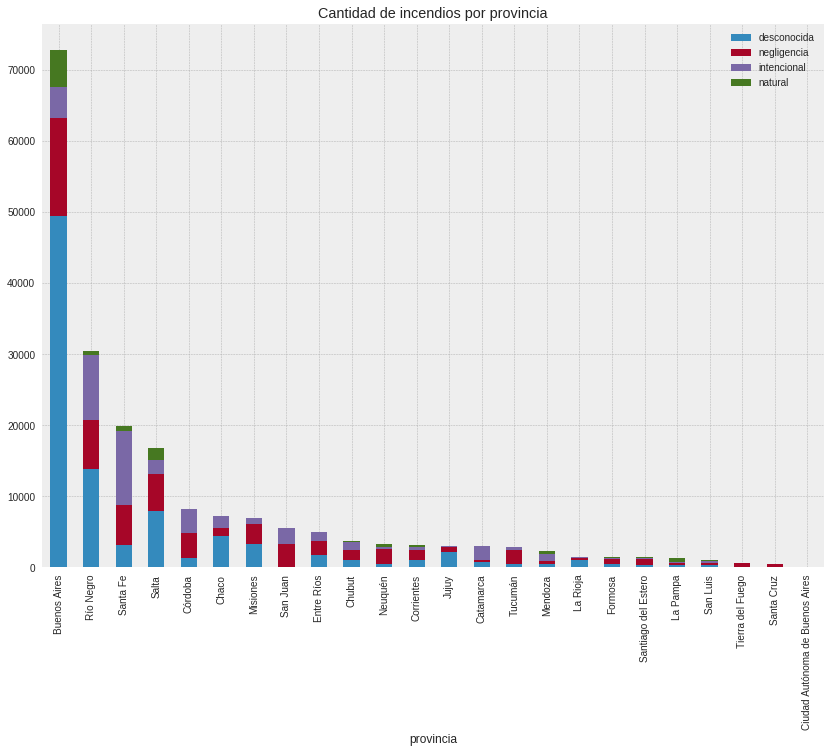

In [44]:
df_provincia = data.groupby('provincia', as_index = True).sum()
df_provincia.sort_values('total', ascending=False).plot(
        y=['desconocida', 'negligencia', 'intencional', 'natural'],
        kind='bar', 
        stacked=True, 
        title="Cantidad de incendios por provincia",
        figsize=(14,10))

plt.show()

Al ver el gráfico discriminado por provincias, podemos ver que no necesariamente respetan una coherencia con las demás provincias de cada región. 

#### Relación entre región y causa de incendio

Vamos a analizar si existe independencia entre la variable región en la que se produce el incendio y causa del incendio, para eso planteamos la hipótesis

Ho = La región en la que se produce el incendio es independiente de la causa del incendio.


In [45]:
obs = data_regiones[['negligencia', 'intencional', 'natural', 'desconocida']]
obs = obs.groupby('region').sum()
display(obs)
chi_cuadrado = sp.stats.chi2_contingency(obs)
print('test:', chi_cuadrado[0])
print('p-value:', chi_cuadrado[1])
print('grados de libertad:', chi_cuadrado[2])
print('Matriz de frecuencias esperadas')
display(pd.DataFrame(data = chi_cuadrado[3]))

,negligencia,intencional,natural,desconocida
region,,,,
Noroeste,8655.0,4844.0,1733.0,11736.0
Noreste,5957.0,3288.0,375.0,9137.0
Cuyo,4224.0,3625.0,585.0,1874.0
Centro,11077.0,14852.0,940.0,6244.0
Buenos Aires,13833.0,4373.0,5206.0,49467.0
Patagonia,11516.0,10886.0,1523.0,15819.0


test: 38646.71944668279
p-value: 0.0
grados de libertad: 15
Matriz de frecuencias esperadas


,0,1,2,3
0,7386.197166,5595.984636,1384.962090,12600.856108
1,5137.307188,3892.164188,963.279959,8764.248666
2,2823.231993,2138.957640,529.375157,4816.435211
3,9069.235641,6871.100536,1700.543225,15472.120598
4,19960.644589,15122.729319,3742.756310,34052.869782
5,10885.383424,8247.063682,2041.083259,18570.469636


Con un grado de significancia de 0.05 y con los 15 grados de libertad que se tiene, nos resulta que el chi-cuadrado de tabla es de 25, por lo tanto como el test calculado es mayor que el valor crítico, se rechaza la hipótesis nula. 

Con lo que se pueden decir que estas 2 variables estan muy relacionadas.

### Superficie afectada por incendios del 1993 al 2016

In [46]:
data.head(3)

total  negligencia  intencional  natural  desconocida  \
anio provincia                                                             
1993 Buenos Aires      0            0            0        0            0   
     Catamarca         0            0            0        0            0   
     Chaco             0            0            0        0            0   

                   sup_total  sup_bosque_nativo  sup_bosque_cultivado  \
anio provincia                                                          
1993 Buenos Aires          0                  0                     0   
     Catamarca             0                  0                     0   
     Chaco                 0                  0                     0   

                   sup_arbustal  sup_pastizal  sup_sin_determinar  
anio provincia                                                     
1993 Buenos Aires             0             0                   0  
     Catamarca                0             0                   0  
     Chaco                    0             0                   0

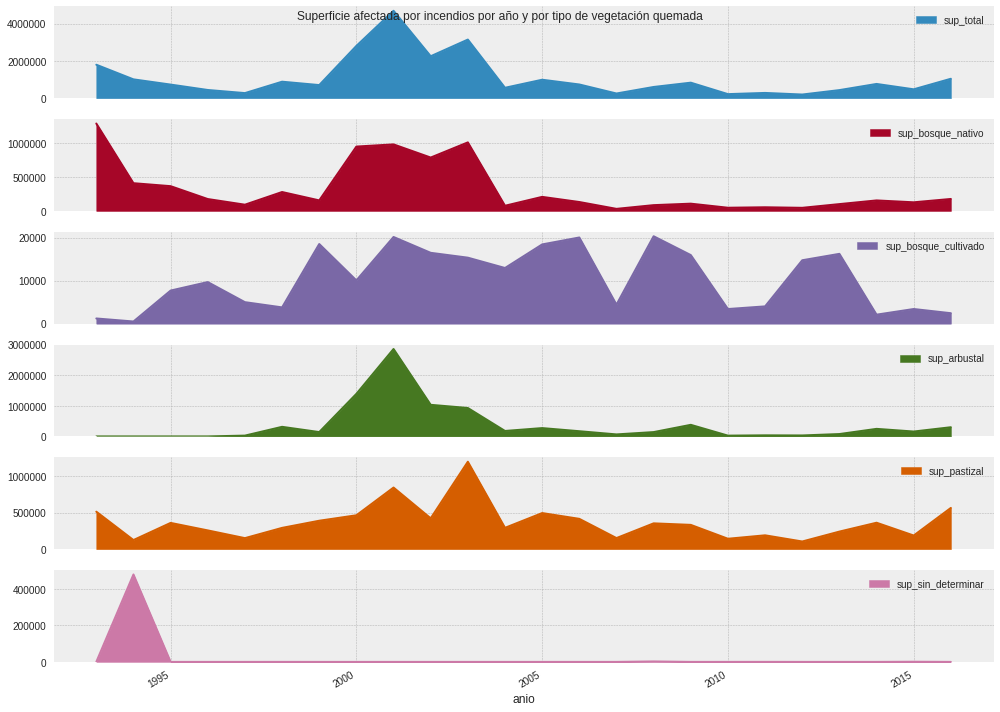

In [47]:
df_anio = data.groupby('anio', as_index = True).sum()
df_anio.plot(y=['sup_total', 'sup_bosque_nativo', 'sup_bosque_cultivado', 'sup_arbustal', 'sup_pastizal', 'sup_sin_determinar'],
        title=u'Superficie afectada por incendios por año y por tipo de vegetación quemada', 
        figsize=(14,10),
        subplots=True,
        kind= 'area')
plt.tight_layout()
plt.show()

Al ver gráficamente la información del tipo de vegetación afectado, podemos ver que solamente en 1994 hay una gran cantidad de superficie en la que no se puede determinar que tipo de vegetación está afectada. Por lo que a partir de esa fecha, hay un bajo porcentaje de datos "desconocidos".

También se puede ver que en el año 2001 se vio afectada una gran región, quemando principalmente vegetación de tipo arbustal (casi 3 millones de hectareas).

Además se puede ver que si bien el bosque cultivado es el que fue afectado más consistentemente a lo largo del tiempo, siempre es en magnitudes pequeñas.

### Análisis espacial por tipo de vegetación afectada

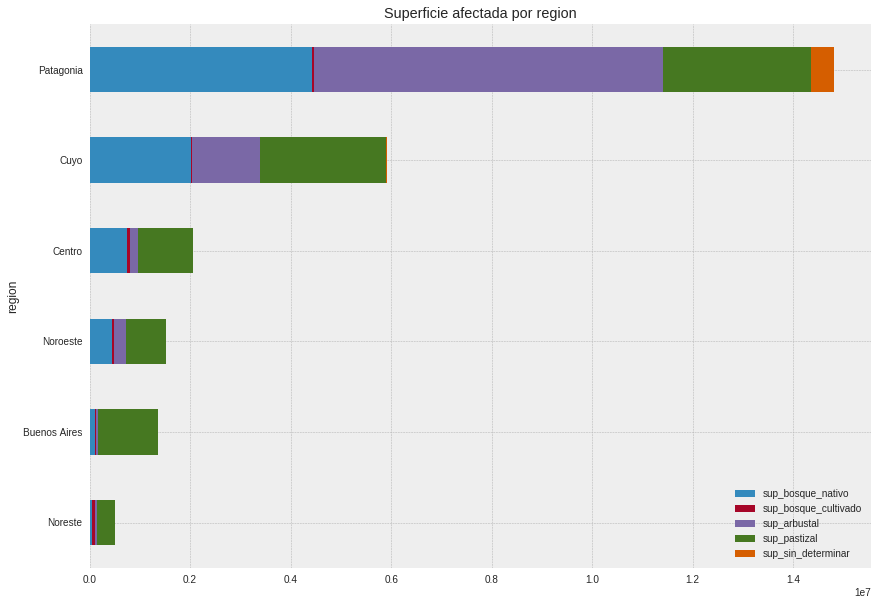

In [48]:
data_regiones.groupby('region', as_index = True).sum().sort_values('sup_total').plot(
    y=['sup_bosque_nativo', 'sup_bosque_cultivado', 'sup_arbustal', 'sup_pastizal', 'sup_sin_determinar'],
    kind='barh', 
    stacked=True, 
    title="Superficie afectada por region", 
    figsize=(14,10))

plt.show()

En este gráfico se puede ver una gran diferencia con el gráfico de la cantidad de incendios, pudiendo ver que no hay una relacion entre la cantidad de incendios y el area afectada. 

La región en Buenos Aires que era la que más incendios habia tenido, es una de las menos afectadas en cuanto a cantidad de hectareas quemadas. De lo que se puede concluir que los incendios pudieron ser controlados rápidamente, no siendo así por ejemplo el caso de la Patagonia, en donde por ejemplo se puede ver que en el 2001, en La Pampa se quemaron casi 3 millones de hectareas (representando un **20%** del area de la provincia)

In [49]:
data.loc[data['sup_total'].argmax()][['sup_total','sup_bosque_nativo', 'sup_bosque_cultivado', 'sup_arbustal', 'sup_pastizal', 'sup_sin_determinar']].to_frame()

,2001
,La Pampa
sup_total,2913817
sup_bosque_nativo,579124
sup_bosque_cultivado,0
sup_arbustal,2334693
sup_pastizal,0
sup_sin_determinar,0


#### Relación entre región y tipo de vegetación afectada

Vamos a analizar si existe independencia entre la variable región en la que se produce el incendio y tipo de vegetación afectada por incendio, para eso planteamos la hipótesis

Ho = La región en la que se produce el incendio es independiente del tipo de vegetación afectada.


In [16]:
obs = data_regiones[['sup_bosque_nativo', 'sup_bosque_cultivado', 'sup_arbustal', 'sup_pastizal', 'sup_sin_determinar']]
obs = obs.groupby('region').sum()
display(obs)
chi_cuadrado = sp.stats.chi2_contingency(obs)
print('test:', chi_cuadrado[0])
print('p-value:', chi_cuadrado[1])
print('grados de libertad:', chi_cuadrado[2])
print('Matriz de frecuencias esperadas:')
pd.DataFrame(data = chi_cuadrado[3])

,sup_bosque_nativo,sup_bosque_cultivado,sup_arbustal,sup_pastizal,sup_sin_determinar
region,,,,,
Noroeste,454102.0,32023.0,243978.0,782759.0,0.0
Noreste,54878.0,57774.0,27858.0,362447.0,322.0
Cuyo,2027186.0,16388.0,1346948.0,2497221.0,25513.0
Centro,738041.0,58371.0,169276.0,1086805.0,0.0
Buenos Aires,102706.0,28485.0,41015.0,1183404.0,10.0
Patagonia,4417917.0,53712.0,6930008.0,2943180.0,457313.0


test: 6134836.532048783
p-value: 0.0
grados de libertad: 20
Matriz de frecuencias esperadas:


,0,1,2,3,4
0,4.511348e+05,14281.116231,5.069421e+05,5.125406e+05,27963.329954
1,1.500776e+05,4750.853611,1.686428e+05,1.705053e+05,9302.472225
2,1.763331e+06,55819.959945,1.981462e+06,2.003345e+06,109299.016453
3,6.120526e+05,19375.125489,6.877660e+05,6.953615e+05,37937.722665
4,4.042453e+05,12796.783041,4.542522e+05,4.592688e+05,25056.911570
5,4.413989e+06,139729.161683,4.960018e+06,5.014795e+06,273598.547131


Con un grado de significancia de 0.05 y con los 15 grados de libertad que se tiene, nos resulta que el chi-cuadrado de tabla es de 31.4, por lo tanto como el test calculado es mayor que el valor crítico, se rechaza la hipótesis nula. 

Con lo que se pueden decir que estas 2 variables estan muy relacionadas.

## Conclusiones

La principal conclusión que se puede obtener es que la gran mayoría de los incendios son producidos por la intervención del hombre. En todas las provincias la categoría de los incendios naturales es la minoritaria.

Otra conclusión importante es la diferencia en las distribuciones en las causas en cada provincia, lo que supone que la cantidad de incendios termina dependiendo de politicas o legislaciones locales.

En cuanto a la evolución temporal se observa un crecimiento en la cantidad de incendios entre los años 2002 y 2009, lo que podría estar causado por el crecimiento en la producción agrícola que sufrió el pais en esos años.

Cuando se combina la información de la cantidad de incendios con la superficie afectada, se puede ver que no están relacionados y que muchos la mayoria de los incendios se controlan rápidamente. Dejando algunos casos en donde el incendio afecta gran cantidad de superficie (como pudimos ver el ejemplo de [La Pampa en el 2001](https://www.clarin.com/sociedad/incendios-forestales-rurales-pesadilla-pampa_0_BkW6yFlAKg.html)). 